In [2]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.stats import spearmanr, ttest_rel
from sklearn.utils import resample
from sklearn.manifold import MDS, TSNE
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
# from skbio.stats.distance import mantel 

In [3]:
# === Load embeddings ===
bert_embeddings = np.load("results/embeddings/bert_output.npy")
clap_embeddings = np.load("results/embeddings/clap_output.npy")
siglip_embeddings = np.load("results/embeddings/siglip_output.npy")
gpt2_embeddings = np.load("results/embeddings/gpt2_output.npy")
roberta_embeddings = np.load("results/embeddings/roberta_output.npy")
blip_embeddings = np.load("results/embeddings/blip_output.npy")

# === Load random embeddings ===
random_bert_embeddings = np.load("results/embeddings/random_bert_output.npy")
random_clap_embeddings = np.load("results/embeddings/random_clap_output.npy")
random_siglip_embeddings = np.load("results/embeddings/random_siglip_output.npy")
random_gpt2_embeddings = np.load("results/embeddings/random_gpt2_output.npy")
random_roberta_embeddings = np.load("results/embeddings/random_roberta_output.npy")
random_blip_embeddings = np.load("results/embeddings/random_blip_output.npy")

In [4]:
# === Generate RDMs (cosine dissimilarity) ===
bert_rdm = squareform(pdist(bert_embeddings, metric="euclidean"))
clap_rdm = squareform(pdist(clap_embeddings, metric="euclidean"))
siglip_rdm = squareform(pdist(siglip_embeddings, metric="euclidean"))
gpt2_rdm = squareform(pdist(gpt2_embeddings, metric="euclidean"))
roberta_rdm = squareform(pdist(roberta_embeddings, metric="euclidean"))
blip_rdm = squareform(pdist(blip_embeddings, metric="euclidean"))


# === Generate random RDMs (euclidean distance) ===
random_bert_rdm = squareform(pdist(random_bert_embeddings, metric="euclidean"))
random_clap_rdm = squareform(pdist(random_clap_embeddings, metric="euclidean"))
random_siglip_rdm = squareform(pdist(random_siglip_embeddings, metric="euclidean"))
random_gpt2_rdm = squareform(pdist(random_gpt2_embeddings, metric="euclidean"))
random_roberta_rdm = squareform(pdist(random_roberta_embeddings, metric="euclidean"))
random_blip_rdm = squareform(pdist(random_blip_embeddings, metric="euclidean"))

In [17]:
# === Create theoretical imagery RDM ===
imagery_scores = np.arange(11)
imagery_rdm = squareform(pdist(imagery_scores[:, None], metric="cityblock"))

In [18]:
# === Flatten for correlation analysis ===
clip_vec = squareform(clip_rdm)
bert_vec = squareform(bert_rdm)
siglip_vec = squareform(siglip_rdm)
gpt2_vec = squareform(gpt2_rdm)
roberta_vec = squareform(roberta_rdm)
blip_vec = squareform(blip_rdm)
imagery_vec = squareform(imagery_rdm)

In [19]:
# === Basic Spearman correlations ===
r_clip, _ = spearmanr(clip_vec, imagery_vec)
r_bert, _ = spearmanr(bert_vec, imagery_vec)
r_clap, _ = spearmanr(clap_vec, imagery_vec)
r_sigplip, _ = spearmanr(siglip_vec, imagery_vec)
r_gpt2, _ = spearmanr(gpt2_vec, imagery_vec)
r_roberta, _ = spearmanr(roberta_vec, imagery_vec)
r_blip, _ = spearmanr(blip_vec, imagery_vec)

In [20]:
# === Spearman correlations ===
r_clip, p_clip = spearmanr(clip_vec, imagery_vec)
r_siglip, p_siglip = spearmanr(siglip_vec, imagery_vec)
r_blip, p_blip = spearmanr(blip_vec, imagery_vec)
r_bert, p_bert = spearmanr(bert_vec, imagery_vec)
r_gpt2, p_gpt2 = spearmanr(gpt2_vec, imagery_vec)
r_roberta, p_roberta = spearmanr(roberta_vec, imagery_vec)


# === Store in DataFrame ===
correlation_df = pd.DataFrame({
    "Model": ["CLIP", "SigLIP", "BLIP", "GPT-2", "BERT", "RoBERTa"],
    "Spearman r": [r_clip, r_siglip, r_blip, r_gpt2, r_bert, r_roberta, ],
    "p-value": [p_clip, p_siglip, p_blip, p_gpt2, p_bert, p_roberta]
})

print("\nCorrelation Table:\n", correlation_df)


Correlation Table:
      Model  Spearman r       p-value
0     CLIP    0.758680  1.941818e-11
1   SigLIP    0.714198  9.225738e-10
2     BLIP    0.030504  8.250283e-01
3    GPT-2    0.401035  2.410761e-03
4     BERT    0.667822  2.553035e-08
5  RoBERTa    0.300422  2.584262e-02


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1462: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


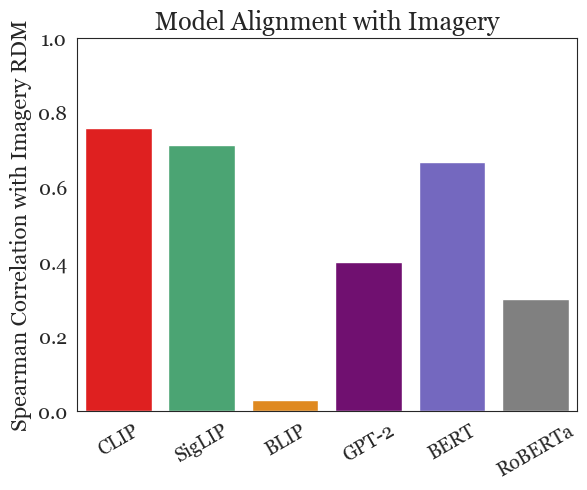

In [21]:
# --- Prepare data ---
model_names = ["CLIP", "SigLIP", "BLIP", "GPT-2", "BERT", "RoBERTa"]
correlations = [
    spearmanr(clip_vec, imagery_vec).correlation,
    spearmanr(siglip_vec, imagery_vec).correlation,
    spearmanr(blip_vec, imagery_vec).correlation,
    spearmanr(gpt2_vec, imagery_vec).correlation,
    spearmanr(bert_vec, imagery_vec).correlation,
    spearmanr(roberta_vec, imagery_vec).correlation,

]

colors = ["red", "mediumseagreen", "darkorange", "purple", "slateblue", "gray"]

# --- Plot ---
plt.figure(figsize=(6, 5))
sns.barplot(x=model_names, y=correlations, palette=colors)
plt.ylabel("Spearman Correlation with Imagery RDM")
plt.title("Model Alignment with Imagery")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

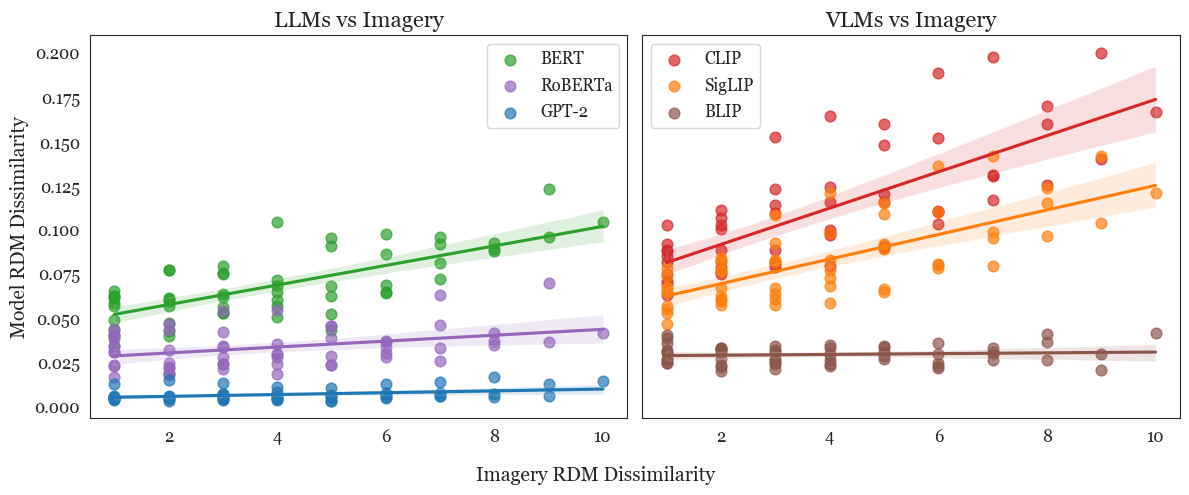

Model correlations with imagery:
CLIP: r = 0.759
SigLIP: r = 0.714
BERT: r = 0.668
GPT-2: r = 0.401
RoBERTa: r = 0.300
BLIP: r = 0.031


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("white")  # no grid
plt.rcParams.update({
    'font.family': 'Georgia',
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
})

# === Spearman correlations ===
from scipy.stats import spearmanr
r_clip, _ = spearmanr(clip_vec, imagery_vec)
r_bert, _ = spearmanr(bert_vec, imagery_vec)
r_siglip, _ = spearmanr(siglip_vec, imagery_vec)
r_gpt2, _ = spearmanr(gpt2_vec, imagery_vec)
r_roberta, _ = spearmanr(roberta_vec, imagery_vec)
r_blip, _ = spearmanr(blip_vec, imagery_vec)

# Distinct colors for each model (easier to distinguish)
colors = {
    "CLIP": "#d62728",      # Red (highest performer)
    "SigLIP": "#ff7f0e",    # Orange
    "BERT": "#2ca02c",      # Green  
    "GPT-2": "#1f77b4",     # Blue
    "RoBERTa": "#9467bd",   # Purple
    "BLIP": "#8c564b"       # Brown (lowest performer)
}

# Calculate x-axis limits with margins
x_min, x_max = imagery_vec.min(), imagery_vec.max()
x_range = x_max - x_min
margin = x_range * 0.05  # 5% margin on each side
x_limits = [x_min - margin, x_max + margin]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# ---- LLMs Plot ----
ax1.set_title("LLMs vs Imagery")
sns.regplot(x=imagery_vec, y=bert_vec, scatter_kws={"alpha": 0.7, "s": 60},
            label="BERT", color=colors["BERT"], ax=ax1)
sns.regplot(x=imagery_vec, y=roberta_vec, scatter_kws={"alpha": 0.7, "s": 60},
            label="RoBERTa", color=colors["RoBERTa"], ax=ax1)
sns.regplot(x=imagery_vec, y=gpt2_vec, scatter_kws={"alpha": 0.7, "s": 60},
            label="GPT-2", color=colors["GPT-2"], ax=ax1)

ax1.set_ylabel("Model RDM Dissimilarity")
ax1.set_xlim(x_limits)
ax1.legend()

# ---- VLMs Plot ----
ax2.set_title("VLMs vs Imagery")
sns.regplot(x=imagery_vec, y=clip_vec, scatter_kws={"alpha": 0.7, "s": 60},
            label="CLIP", color=colors["CLIP"], ax=ax2)
sns.regplot(x=imagery_vec, y=siglip_vec, scatter_kws={"alpha": 0.7, "s": 60},
            label="SigLIP", color=colors["SigLIP"], ax=ax2)
sns.regplot(x=imagery_vec, y=blip_vec, scatter_kws={"alpha": 0.7, "s": 60},
            label="BLIP", color=colors["BLIP"], ax=ax2)

ax2.set_ylabel("")
ax2.set_xlim(x_limits)
ax2.legend()

# ---- Shared X-axis label (closer to plots) ----
fig.supxlabel('Imagery RDM Dissimilarity', fontsize=14, y=0.02)

plt.tight_layout()
plt.show()

# Print correlations for reference
correlations = {
    "CLIP": r_clip,
    "SigLIP": r_siglip, 
    "BERT": r_bert,
    "GPT-2": r_gpt2,
    "RoBERTa": r_roberta,
    "BLIP": r_blip
}

print("Model correlations with imagery:")
for model, corr in sorted(correlations.items(), key=lambda x: x[1], reverse=True):
    print(f"{model}: r = {corr:.3f}")

/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_81536/2056175586.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


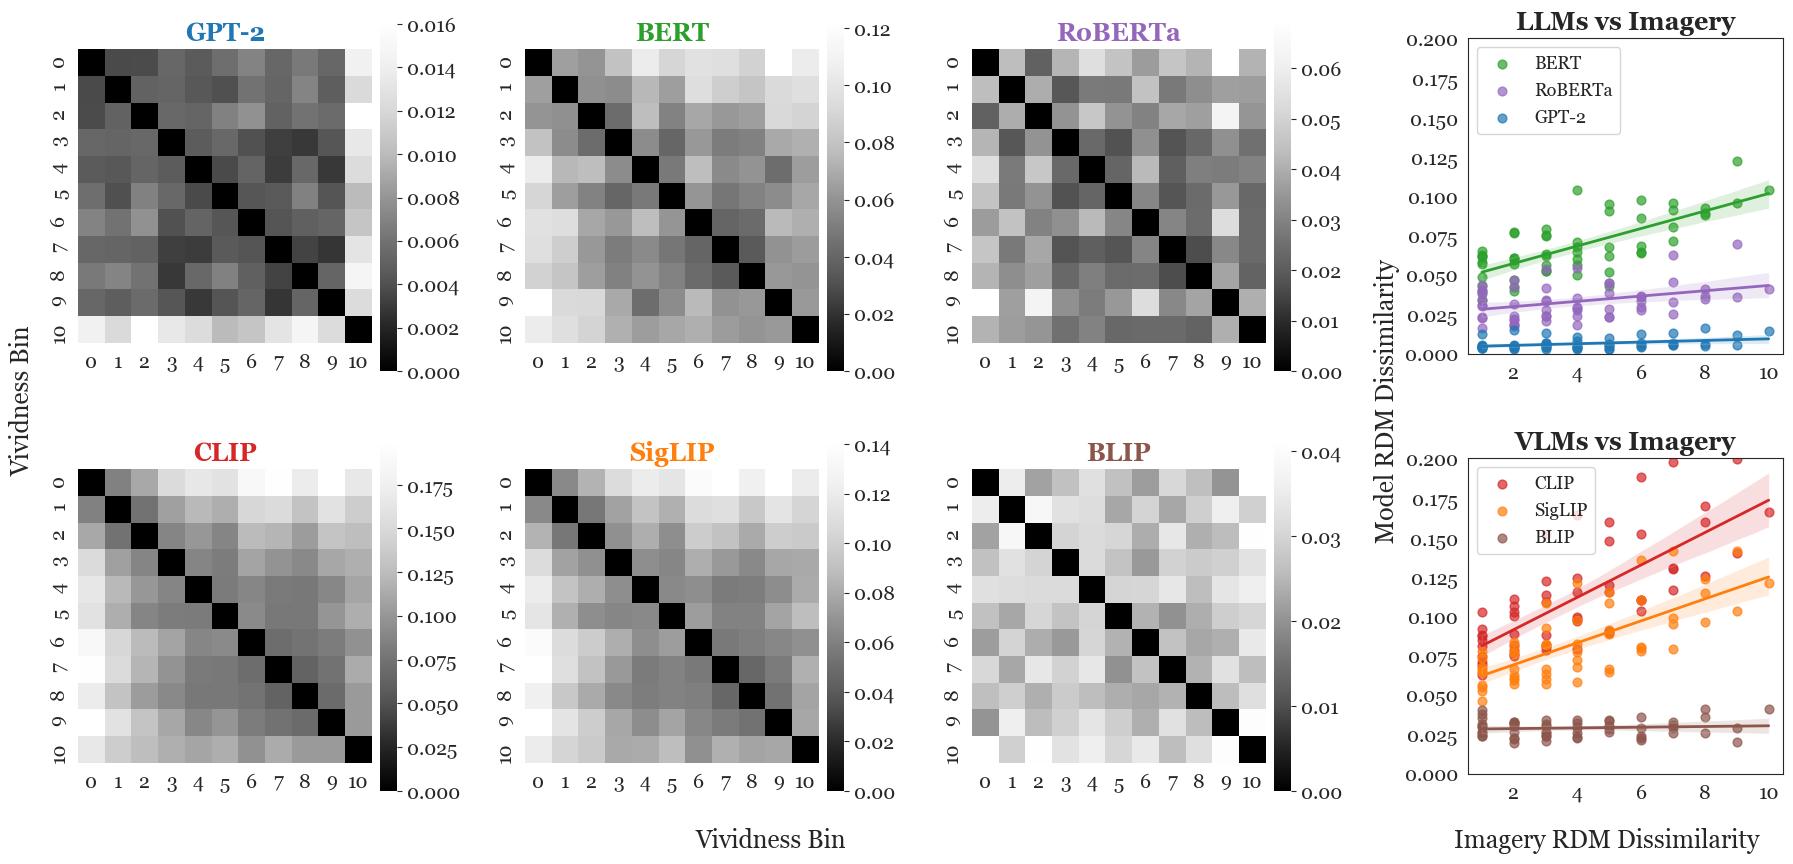

In [40]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr

# Font and style
sns.set_style("white")
plt.rcParams.update({
    'font.family': 'Georgia',
    'axes.titlesize': 18,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14
})

# Color palette
colors = {
    "GPT-2": "#1f77b4",
    "BERT": "#2ca02c",
    "RoBERTa": "#9467bd",
    "CLIP": "#d62728",
    "SigLIP": "#ff7f0e",
    "BLIP": "#8c564b"
}

# Your RDMs and vectors (replace with actual data)
model_rdms = [
    ("GPT-2", gpt2_rdm),
    ("BERT", bert_rdm),
    ("RoBERTa", roberta_rdm),
    ("CLIP", clip_rdm),
    ("SigLIP", siglip_rdm),
    ("BLIP", blip_rdm),
]

# Create figure
fig = plt.figure(figsize=(22, 10))
outer = gridspec.GridSpec(2, 4, width_ratios=[1, 1, 1, 1.1], wspace=0.6, hspace=0.2)

# Function to plot RDM with custom colorbar
def add_heatmap(gs_cell, rdm, title, color):
    inner = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs_cell, width_ratios=[20, 1.2], wspace=0.05)
    ax = fig.add_subplot(inner[0])
    cax = fig.add_subplot(inner[1])
    sns.heatmap(
        rdm,
        ax=ax,
        cbar=True,
        cbar_ax=cax,
        cmap="Greys_r",
        cbar_kws={"shrink": 1.0, "pad": 0.02},
        xticklabels=range(11),
        yticklabels=range(11)
    )
    ax.set_title(title, color=color, fontweight='bold')
    ax.set_box_aspect(1)
    cax.set_aspect('auto')

# --- RDM shared axis labels ---
fig.text(0.1, 0.5, 'Vividness Bin', va='center', ha='center', rotation='vertical', fontsize=18)
fig.text(0.44, 0.06, 'Vividness Bin', va='center', ha='center', fontsize=18)

# --- RDM layout (rows 0 and 1, cols 0–2) ---
rdm_row0 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=outer[0, 0:3], wspace=0.4)
rdm_row1 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=outer[1, 0:3], wspace=0.4)
for i, (title, rdm) in enumerate(model_rdms[:3]):
    add_heatmap(rdm_row0[0, i], rdm, title, colors[title])
for i, (title, rdm) in enumerate(model_rdms[3:]):
    add_heatmap(rdm_row1[0, i], rdm, title, colors[title])

# --- Scatterplot x-axis range ---
x_min, x_max = imagery_vec.min(), imagery_vec.max()
x_range = x_max - x_min
margin = x_range * 0.05
x_limits = [x_min - margin, x_max + margin]

# --- LLM scatterplot (top right) ---
ax_llm = fig.add_subplot(outer[0, 3])
for model in ["BERT", "RoBERTa", "GPT-2"]:
    model_vec = {"BERT": bert_vec, "RoBERTa": roberta_vec, "GPT-2": gpt2_vec}[model]
    sns.regplot(
        x=imagery_vec,
        y=model_vec,
        scatter_kws={"alpha": 0.7, "s": 40},
        line_kws={"linewidth": 2},
        label=model,
        color=colors[model],
        ax=ax_llm
    )
ax_llm.set_title("LLMs vs Imagery", fontweight='bold')
ax_llm.set_xlim(x_limits)
ax_llm.set_ylim([0, 0.2])  # Fixed y-axis
ax_llm.legend(loc='upper left', fontsize=13)
ax_llm.set_box_aspect(1)

# --- VLM scatterplot (bottom right) ---
ax_vlm = fig.add_subplot(outer[1, 3])
for model in ["CLIP", "SigLIP", "BLIP"]:
    model_vec = {"CLIP": clip_vec, "SigLIP": siglip_vec, "BLIP": blip_vec}[model]
    sns.regplot(
        x=imagery_vec,
        y=model_vec,
        scatter_kws={"alpha": 0.7, "s": 40},
        line_kws={"linewidth": 2},
        label=model,
        color=colors[model],
        ax=ax_vlm
    )
ax_vlm.set_title("VLMs vs Imagery", fontweight='bold')
ax_vlm.set_xlim(x_limits)
ax_vlm.set_ylim([0, 0.2])  # Fixed y-axis
ax_vlm.legend(loc='upper left', fontsize=13)
ax_vlm.set_box_aspect(1)

# --- Shared scatterplot axis labels ---
fig.text(0.82, 0.06, 'Imagery RDM Dissimilarity', va='center', ha='center', fontsize=18)
fig.text(0.72, 0.5, 'Model RDM Dissimilarity', va='center', ha='center', rotation='vertical', fontsize=18)

# Show final figure
# Show and save figure
plt.tight_layout()
plt.savefig("../plots/rdm_scatter_figure.png", dpi=300, bbox_inches="tight", format="png")
# Optional: plt.savefig("rdm_scatter_figure.pdf", bbox_inches="tight")
plt.show()

/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_81536/2186675656.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{t:.2f}'.replace('0.', '.') for t in ticks])
/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_81536/2186675656.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{t:.2f}'.replace('0.', '.') for t in ticks])
/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_81536/2186675656.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{t:.2f}'.replace('0.', '.') for t in ticks])
/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_81536/2186675656.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of t

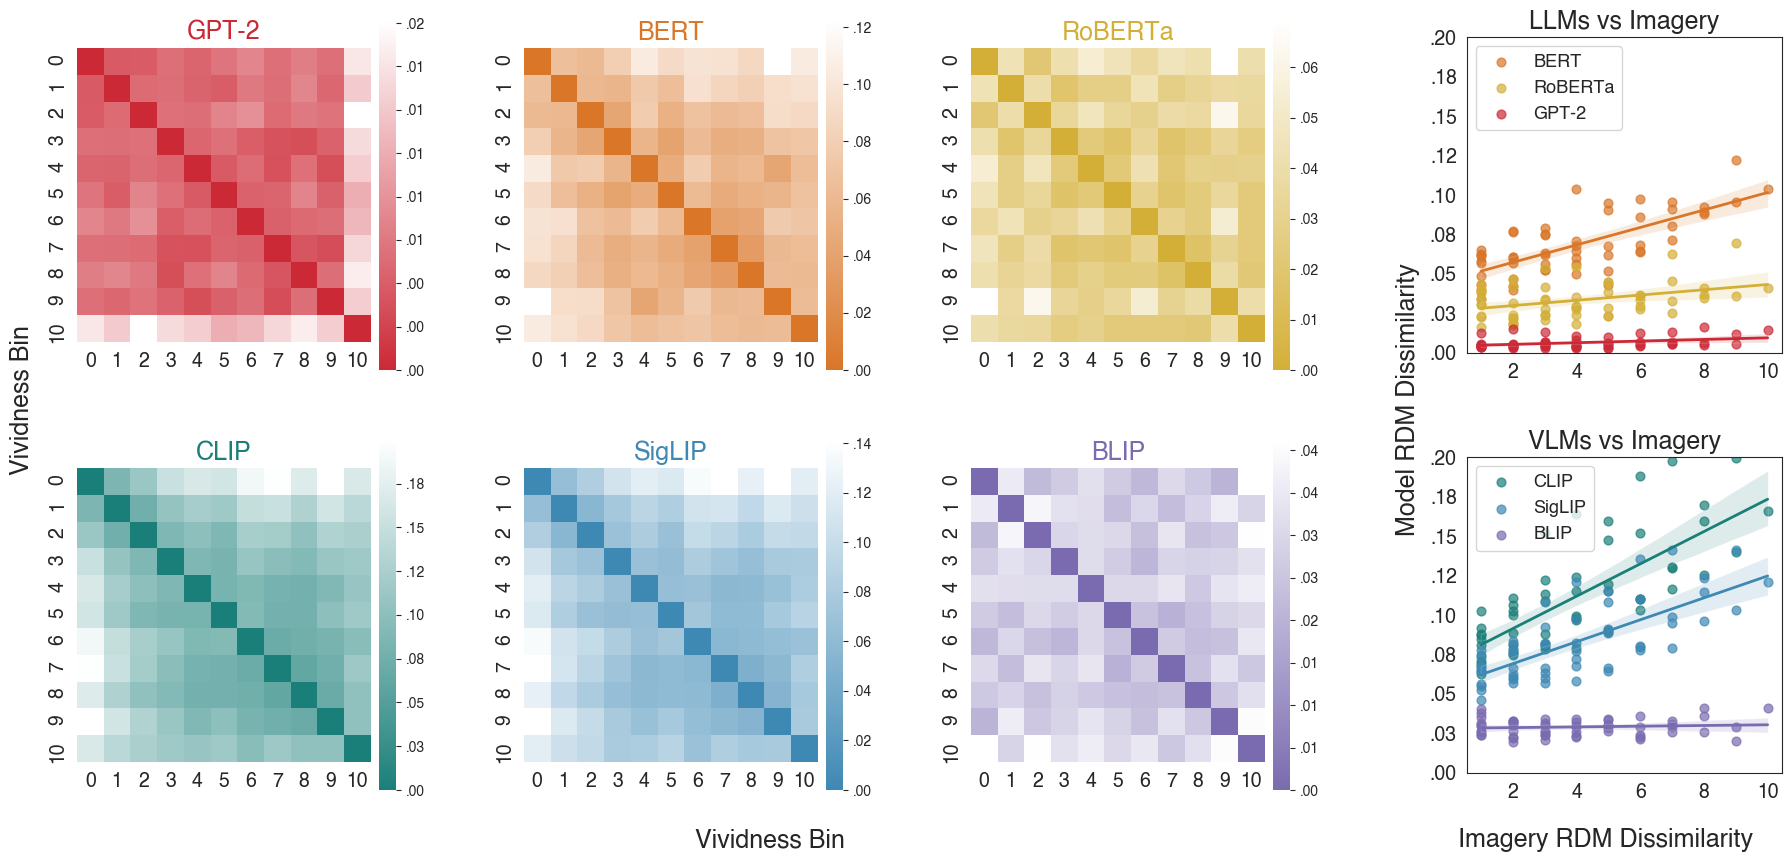

In [62]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# ------------------------------------------------------------------
# 0 · Style  (Helvetica instead of Georgia)
# ------------------------------------------------------------------
sns.set_style("white")
plt.rcParams.update({
    "font.family": "Helvetica",
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14
})

# ------------------------------------------------------------------
# 1 · Color palette  (unchanged)
# ------------------------------------------------------------------
colors = {
    "GPT-2":   "#CC2936",  # Red
    "BERT":    "#D97628",  # Orange
    "RoBERTa": "#D4AF37",  # Yellow
    "CLIP":    "#1B7F79",  # Teal
    "SigLIP":  "#3E88B4",  # Blue
    "BLIP":    "#7A6BB0"   # Violet
}

# ------------------------------------------------------------------
# 2 · Data  (replace with your real arrays)
# ------------------------------------------------------------------
model_rdms = [
    ("GPT-2",   gpt2_rdm),
    ("BERT",    bert_rdm),
    ("RoBERTa", roberta_rdm),
    ("CLIP",    clip_rdm),
    ("SigLIP",  siglip_rdm),
    ("BLIP",    blip_rdm)
]

vec_dict = {
    "GPT-2":   gpt2_vec,
    "BERT":    bert_vec,
    "RoBERTa": roberta_vec,
    "CLIP":    clip_vec,
    "SigLIP":  siglip_vec,
    "BLIP":    blip_vec
}
# imagery_vec = <your imagery RDM vector>

# ------------------------------------------------------------------
# 3 · Helper: white → model-color colormap
# ------------------------------------------------------------------
def make_cmap(hex_color, n=256):
    rgb = sns.color_palette([hex_color])[0]
    return LinearSegmentedColormap.from_list(
        f"{hex_color}_map", [rgb, (1, 1, 1)], N=n
    )

# ------------------------------------------------------------------
# 4 · Helper: add heat-map with formatted color-bar
# ------------------------------------------------------------------
def add_heatmap(gs_cell, rdm, title, color_hex):
    inner = gridspec.GridSpecFromSubplotSpec(
        1, 2, subplot_spec=gs_cell, width_ratios=[20, 1.2], wspace=0.05
    )
    ax  = fig.add_subplot(inner[0])
    cax = fig.add_subplot(inner[1])

    sns.heatmap(
        rdm,
        ax=ax,
        cmap=make_cmap(color_hex),
        cbar=True,
        cbar_ax=cax,
        cbar_kws={"shrink": 1.0, "pad": 0.02},
        xticklabels=range(11),
        yticklabels=range(11),
        vmin=rdm.min(), vmax=rdm.max()
    )
    ax.set_title(title, color=color_hex, fontweight="bold")
    ax.set_box_aspect(1)

    # ---- format color-bar tick labels (.12 style) ----
    cbar = ax.collections[0].colorbar
    ticks = cbar.get_ticks()
    cbar.set_ticklabels([f'{t:.2f}'.replace('0.', '.') for t in ticks])
    cbar.ax.tick_params(labelsize=10)
    cax.set_aspect('auto')

# ------------------------------------------------------------------
# 5 · Figure & layout  (unchanged)
# ------------------------------------------------------------------
fig = plt.figure(figsize=(22, 10))
outer = gridspec.GridSpec(2, 4, width_ratios=[1, 1, 1, 1.1],
                          wspace=0.6, hspace=0.2)

fig.text(0.10, 0.50, "Vividness Bin",  va="center", ha="center",
         rotation="vertical", fontsize=18)
fig.text(0.44, 0.06, "Vividness Bin",  va="center", ha="center",
         fontsize=18)

row0 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=outer[0, 0:3],
                                        wspace=0.4)
row1 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=outer[1, 0:3],
                                        wspace=0.4)

for i, (title, rdm) in enumerate(model_rdms[:3]):
    add_heatmap(row0[0, i], rdm, title, colors[title])

for i, (title, rdm) in enumerate(model_rdms[3:]):
    add_heatmap(row1[0, i], rdm, title, colors[title])

# ------------------------------------------------------------------
# 6 · Scatter-plot axes limits  (unchanged)
# ------------------------------------------------------------------
x_min, x_max = imagery_vec.min(), imagery_vec.max()
margin       = (x_max - x_min) * 0.05
x_limits     = [x_min - margin, x_max + margin]

# Helper to format y-tick labels
def format_yticks(ax):
    ax.set_yticklabels(
        [f'{y:.2f}'.replace("0.", ".") for y in ax.get_yticks()]
    )

# ------------------------------------------------------------------
# 7 · LLM scatter (top-right)
# ------------------------------------------------------------------
ax_llm = fig.add_subplot(outer[0, 3])
for model in ["BERT", "RoBERTa", "GPT-2"]:
    sns.regplot(
        x=imagery_vec,
        y=vec_dict[model],
        scatter_kws={"alpha": 0.7, "s": 40},
        line_kws={"linewidth": 2},
        label=model,
        color=colors[model],
        ax=ax_llm
    )
ax_llm.set_title("LLMs vs Imagery", fontweight="bold")
ax_llm.set_xlim(x_limits)
ax_llm.set_ylim([0, 0.2])
format_yticks(ax_llm)
ax_llm.legend(loc="upper left", fontsize=13)
ax_llm.set_box_aspect(1)

# ------------------------------------------------------------------
# 8 · VLM scatter (bottom-right)
# ------------------------------------------------------------------
ax_vlm = fig.add_subplot(outer[1, 3])
for model in ["CLIP", "SigLIP", "BLIP"]:
    sns.regplot(
        x=imagery_vec,
        y=vec_dict[model],
        scatter_kws={"alpha": 0.7, "s": 40},
        line_kws={"linewidth": 2},
        label=model,
        color=colors[model],
        ax=ax_vlm
    )
ax_vlm.set_title("VLMs vs Imagery", fontweight="bold")
ax_vlm.set_xlim(x_limits)
ax_vlm.set_ylim([0, 0.2])
format_yticks(ax_vlm)
ax_vlm.legend(loc="upper left", fontsize=13)
ax_vlm.set_box_aspect(1)

# Shared scatter labels
fig.text(0.82, 0.06, "Imagery RDM Dissimilarity",
         ha="center", va="center", fontsize=18)
fig.text(0.73, 0.50, "Model RDM Dissimilarity",
         ha="center", va="center", rotation="vertical", fontsize=18)

# ------------------------------------------------------------------
# 9 · Save & show
# ------------------------------------------------------------------
plt.tight_layout()
plt.savefig("rdm_scatter_figure_color.png",
            dpi=300, bbox_inches="tight", format="png")
plt.show()


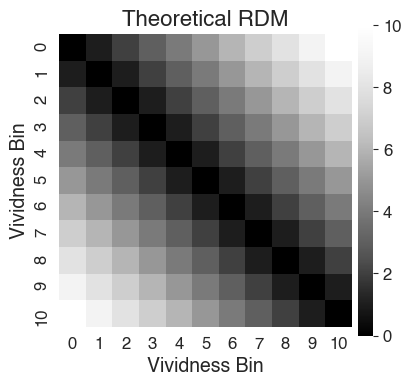

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ------------------------------------------------------------
# 0 · Style: Use Helvetica and increase font sizes
# ------------------------------------------------------------
sns.set_style("white")
plt.rcParams.update({
    "font.family": "Helvetica",
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12
})

# ------------------------------------------------------------
# 1 · Global min/max from other model RDMs (if needed)
# ------------------------------------------------------------
all_model_values = np.concatenate([rdm.flatten() for name, rdm in model_rdms if name != "Imagery"])
vmin = all_model_values.min()
vmax = all_model_values.max()

# ------------------------------------------------------------
# 2 · Plot the Theoretical RDM
# ------------------------------------------------------------
fig, ax = plt.subplots(1, 1, figsize=(4, 4), constrained_layout=True)

sns.heatmap(
    imagery_rdm,
    ax=ax,
    cmap="Greys_r",
    square=True,
    vmin=0,              # good default
#     vmax=vmax,         
    cbar=True,
    cbar_kws={"shrink": 0.8, "pad": 0.02}
)

ax.set_title("Theoretical RDM", fontsize=16, fontweight="bold")
ax.set_xlabel("Vividness Bin", fontsize=14)
ax.set_ylabel("Vividness Bin", fontsize=14)
ax.set_xticklabels(range(imagery_rdm.shape[1]), fontsize=12)
ax.set_yticklabels(range(imagery_rdm.shape[0]), fontsize=12)
ax.set_box_aspect(1)

# Optional: Save
plt.savefig("imagery_rdm_standalone.png", dpi=300, bbox_inches="tight")

plt.show()


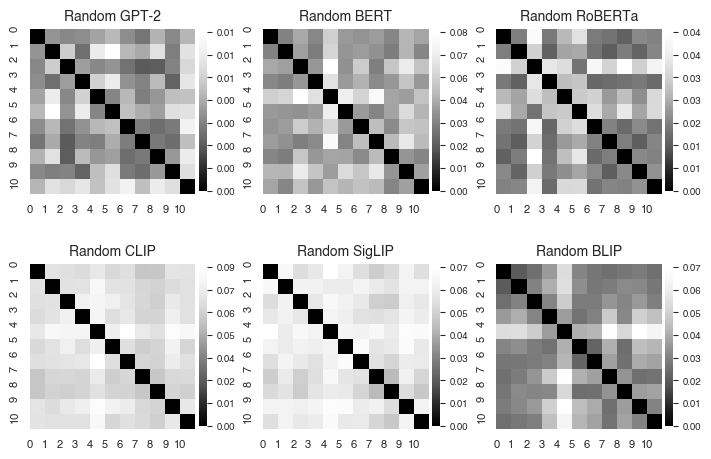

In [45]:
# Define the 6 random RDMs in the desired order
random_model_rdms = [
    ("Random GPT-2", random_gpt2_rdm),
    ("Random BERT", random_bert_rdm),
    ("Random RoBERTa", random_roberta_rdm),
    ("Random CLIP", random_clip_rdm),
    ("Random SigLIP", random_siglip_rdm),
    ("Random BLIP", random_blip_rdm),
]

# Create 2 rows x 3 columns of subplots
fig, axes = plt.subplots(2, 3, figsize=(7.0, 4.7), constrained_layout=True)

# Flatten axes to iterate easily
axes = axes.flatten()

# Plot each random RDM heatmap
for ax, (title, rdm) in zip(axes, random_model_rdms):
    sns.heatmap(
        rdm,
        ax=ax,
        cmap="Greys_r",
        square=True,
        cbar=True,
        cbar_kws={"shrink": 0.7, "pad": 0.02, "ticks": None},
        annot=False,
        fmt='.2f'
    )
    ax.set_title(f"{title}", fontsize=10)
    
    # Set x and y axis ticks to show values 0-10
    ax.set_xticks(range(11))
    ax.set_yticks(range(11))
    ax.set_xticklabels(range(11), fontsize=8)
    ax.set_yticklabels(range(11), fontsize=8)
    
    # Add more granular colorbar ticks
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=7)
    
    # Set more tick marks for finer granularity
    vmin, vmax = rdm.min(), rdm.max()
    tick_range = np.linspace(vmin, vmax, 8)  # 8 ticks for more granularity
    cbar.set_ticks(tick_range)
    cbar.set_ticklabels([f'{x:.2f}' for x in tick_range])

plt.savefig("../plots/random_rdm_heatmaps.png", dpi=300, bbox_inches='tight')

plt.show()

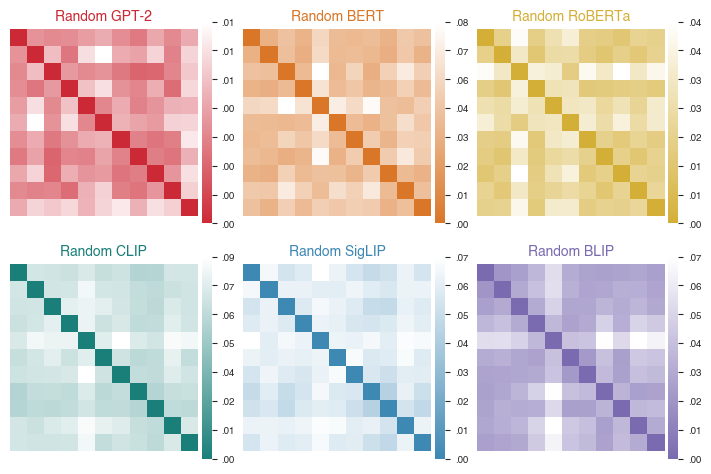

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# ------------------------------------------------------------
# 0 · Global style  (Helvetica)
# ------------------------------------------------------------
sns.set_style("white")
plt.rcParams.update({
    "font.family": "Helvetica",
    "axes.titlesize": 12,
    "axes.labelsize": 10,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "legend.fontsize": 10
})

# ------------------------------------------------------------
# 1 · Model-matched color palette
# ------------------------------------------------------------
colors = {
    "Random GPT-2":   "#CC2936",  # warm red
    "Random BERT":    "#D97628",  # warm orange
    "Random RoBERTa": "#D4AF37",  # warm yellow
    "Random CLIP":    "#1B7F79",  # cool teal
    "Random SigLIP":  "#3E88B4",  # cool blue
    "Random BLIP":    "#7A6BB0"   # cool violet
}

# ------------------------------------------------------------
# 2 · Helper: dark→white gradient for each model
# ------------------------------------------------------------
def make_cmap(hex_color, n=256):
    rgb = sns.color_palette([hex_color])[0]
    return LinearSegmentedColormap.from_list(
        f"{hex_color}_map", [rgb, (1, 1, 1)], N=n
    )

# ------------------------------------------------------------
# 3 · Random RDMs (replace with your real arrays)
# ------------------------------------------------------------
random_model_rdms = [
    ("Random GPT-2",   random_gpt2_rdm),
    ("Random BERT",    random_bert_rdm),
    ("Random RoBERTa", random_roberta_rdm),
    ("Random CLIP",    random_clip_rdm),
    ("Random SigLIP",  random_siglip_rdm),
    ("Random BLIP",    random_blip_rdm)
]

# ------------------------------------------------------------
# 4 · Plot 2×3 grid
# ------------------------------------------------------------
fig, axes = plt.subplots(2, 3, figsize=(7.0, 4.7), constrained_layout=True)
axes = axes.flatten()

for ax, (title, rdm) in zip(axes, random_model_rdms):
    cmap = make_cmap(colors[title])

    sns.heatmap(
        rdm,
        ax=ax,
        cmap=cmap,
        square=True,
        cbar=True,
        cbar_kws={"shrink": 0.9, "pad": 0.02},
        xticklabels=range(11),          # 0–10 left→right
        yticklabels=range(10, -1, -1),  # 10 top … 0 bottom
        vmin=rdm.min(), vmax=rdm.max()
    )

    # title
    ax.set_title(title, fontsize=10, color=colors[title], fontweight='bold')

    # ticks
    ax.set_xticks(range(11))
    ax.set_yticks(range(11))

    # ---- format color-bar ticks (.12 not 0.12) ----
    cbar = ax.collections[0].colorbar
    tick_vals = np.linspace(rdm.min(), rdm.max(), 8)
    cbar.set_ticks(tick_vals)
    cbar.set_ticklabels([f'{v:.2f}'.replace('0.', '.') for v in tick_vals])
    cbar.ax.tick_params(labelsize=7)

# ------------------------------------------------------------
# 5 · Save & show
# ------------------------------------------------------------
plt.savefig("../plots/random_rdm_heatmaps_color.png", dpi=300, bbox_inches='tight')
plt.show()
